In [1]:
import pandas as pd
import numpy as np

# Эпизод 1

## Задача #1

In [2]:
df = pd.read_csv('transactions.csv')
print(df.loc[df['STATUS'] == 'OK'].sort_values(by='SUM', ascending=False)[0 : 3])

      Unnamed: 0     CONTRACTOR STATUS     SUM
5085        5085      Acme, Inc     OK  100500
4451        4451  Umbrella, Inc     OK    1000
1348        1348      Acme, Inc     OK     999


## Задача #2

In [3]:
print(df.loc[df['CONTRACTOR'] == 'Umbrella, Inc'].loc[df['STATUS'] == 'OK']['SUM'].sum())

925719


# Эпизод 2

CARGO
Jumbo      76795
Medium     36312
Nimble    752588
Name: PRICE, dtype: int64
CARGO
Jumbo     18709
Medium     9507
Nimble     7545
Name: WEIGHT, dtype: int64


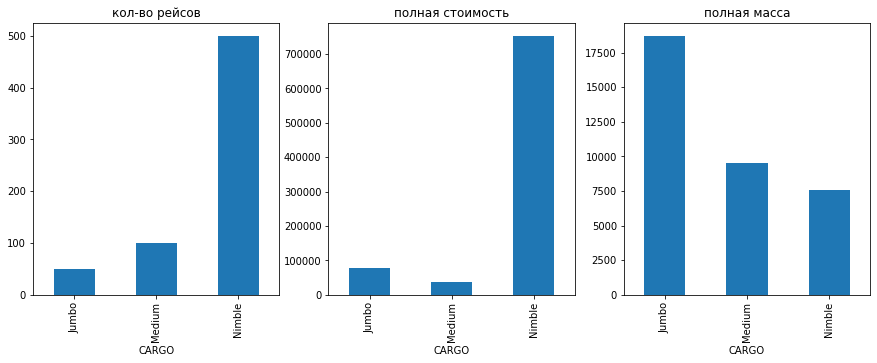

In [4]:
import matplotlib.pyplot as plt
df = pd.read_csv('flights.csv')

fig, axes = plt.subplots(1, 3, figsize=(15,5))
aggr1 = df.groupby('CARGO').size()
aggr2 = df.groupby('CARGO')['PRICE'].sum()
aggr3 = df.groupby('CARGO')['WEIGHT'].sum()

aggr1.plot(kind='bar', ax=axes[0], title='кол-во рейсов')
aggr2.plot(kind='bar', ax=axes[1], title='полная стоимость')
aggr3.plot(kind='bar', ax=axes[2], title='полная масса')

print(df.groupby('CARGO')['PRICE'].sum())
print(df.groupby('CARGO')['WEIGHT'].sum())

# Эпизод 3

## Задача 1

<AxesSubplot:xlabel='group_out'>

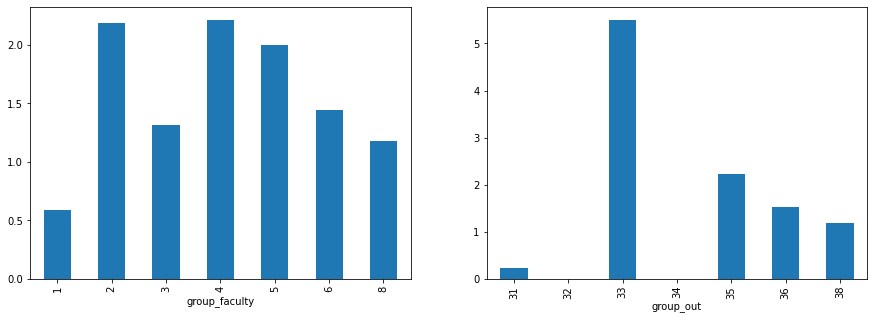

In [5]:
df1 = pd.read_excel('students_info.xlsx')
df2 = pd.read_html('results_ejudge.html')[0]

data = df1.merge(df2, left_on='login', right_on='User').fillna(value=0)


fig, axes = plt.subplots(1, 2, figsize=(15,5))
data1 = data.groupby(['group_faculty']).mean()['Solved']
data2 = data.groupby(['group_out']).mean()['Solved']
data1.plot(kind='bar', ax=axes[0])
data2.plot(kind='bar', ax=axes[1])

In [6]:
print(data)

        login  group_faculty  group_out   Place      User     A     B     C  \
0    r0300101              1         35      30  r0300101  10.0   6.0   0.0   
1    r0300102              1         32  75-129  r0300102   0.0   0.0   0.0   
2    r0300103              1         32  75-129  r0300103   0.0   0.0   0.0   
3    r0300104              1         32  75-129  r0300104   0.0   0.0   0.0   
4    r0300105              1         32  75-129  r0300105   0.0   0.0   0.0   
..        ...            ...        ...     ...       ...   ...   ...   ...   
105  r0300807              8         38   47-49  r0300807  10.0   8.0   0.0   
106  r0300808              8         38      29  r0300808   9.0   3.0  19.0   
107  r0300809              8         38      17  r0300809   9.0   0.0  20.0   
108  r0300810              8         38   47-49  r0300810  10.0  10.0   0.0   
109  r0300811              8         38   50-52  r0300811   9.0   6.0   2.0   

       D     E     F    G    H  Solved  Score  
0  

## Задача 2

In [7]:
gh = data[(data['G']>=10) | (data['H']>=10)][['User', 'group_out', 'group_faculty']]

<AxesSubplot:title={'center':'Where from'}, xlabel='group_out'>

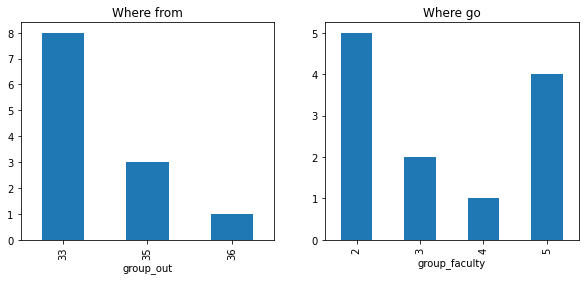

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
gh.groupby(['group_faculty']).size().plot(kind='bar',ax = axes[1], title = 'Where go')
gh.groupby(['group_out']).size().plot(kind='bar', ax = axes[0], title='Where from')

## Дополнительное задание

In [17]:
print(data.loc[data['group_out'] == 32 & data['group_out'] == 34].loc[:, 'Solved'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Задание довольно таки неоднозначно сформулировано, но я полагаю, так и будет на работе)))).
Мне кажется данные не очень правдивые, потому что некоторые группы(32 и 34) не писали контрольную, получается что они скорее всего не проходили этот предмет, а значит, оценивая среднее кол-во решенных задач по факультетам они портят результат для номера факультета. Т.е. нарушается объективность.  
Или например это:

In [13]:
print(data.loc[data['group_out'] == 31].loc[:, 'Solved'])

34    0
38    0
39    0
43    0
47    0
49    0
50    0
66    1
74    1
Name: Solved, dtype: int64


Довольно таки странно, что в группе всего 2 человека решили по 1ой задаче, конечно, всякое бывает, но это смахивает на ложь. Вроде как нарушается актуальность.